<a href="https://colab.research.google.com/github/hakinamz/2020-Kaggle-Machine-Learning-Data-Science-Survey/blob/main/googlestock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files
uploaded = files.upload()


Saving google_stock.csv to google_stock (1).csv


**Import Python Modules**

In [19]:
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
#from __future__ import division

**Importing the Stock Prices**

In [20]:
GOOG=pd.read_csv('google_stock (1).csv')

**Displaying Apple Stock Data**

In [21]:
GOOG.head()

,date,stock
0,2/7/2005,196.03
1,2/8/2005,198.64
2,2/9/2005,191.58
3,2/10/2005,187.98
4,2/11/2005,187.40


In [22]:
GOOG.index

RangeIndex(start=0, stop=105, step=1)

**Describing the Data**

In [23]:
GOOG.describe().T

,count,mean,std,min,25%,50%,75%,max
stock,105.0,224.715238,42.976002,174.99,187.4,215.81,274.8,304.1


**Info of Data**

In [24]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    105 non-null    object 
 1   stock   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


**Display Historical Stock Price**

In [25]:
GOOG['date']=pd.to_datetime(GOOG['date'])

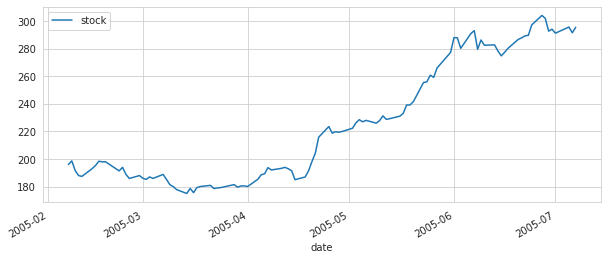

In [26]:
GOOG.plot(x='date', y='stock',legend=True,figsize=(10,4))
plt.ioff()

**Volume traded for GOOGLE Stock**

In [27]:
title='VOLUME TRADED'
ylabel='Partial Correlogram'
xlabel='Correlogram'

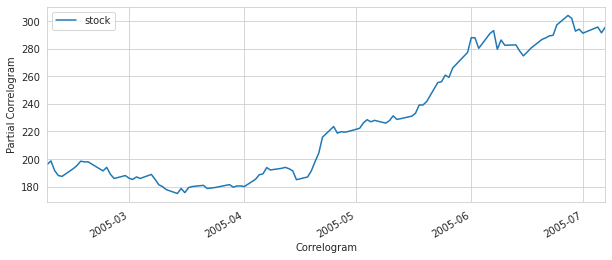

In [30]:
ax=GOOG.plot(x='date', y='stock',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  # use both if want to scale both axis
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.ioff()

**Plotting Stock Price Between Specified Time**

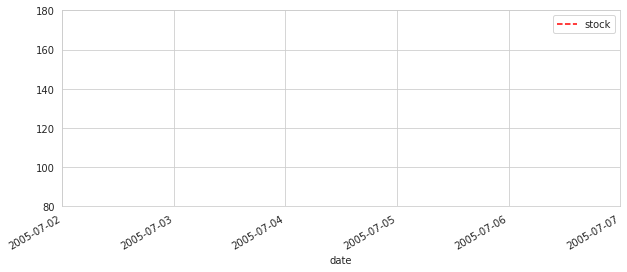

In [31]:
GOOG.plot(x='date', y='stock',xlim=['2005-07-02','2005-07-07'],ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')
plt.ioff()

In [32]:
"""from matplotlib import dates
GOOG.plot(x='date', y='stock',xlim=['2005-07-02','2005-07-07'],ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
plt.ioff()
"""

"from matplotlib import dates\nGOOG.plot(x='date', y='stock',xlim=['2005-07-02','2005-07-07'],ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')\nax.set(xlabel='')\nax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))\nax.xaxis.set_major_formatter(dates.DateFormatter('%d'))\nax.xaxis.set_minor_locator(dates.MonthLocator())\nax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))\nplt.ioff()\n"

**Moving Average for Apple Stock**

In [35]:
GOOG['stock_10']=GOOG['stock'].rolling(10).mean()
GOOG['stock_50']=GOOG['stock'].rolling(50).mean()

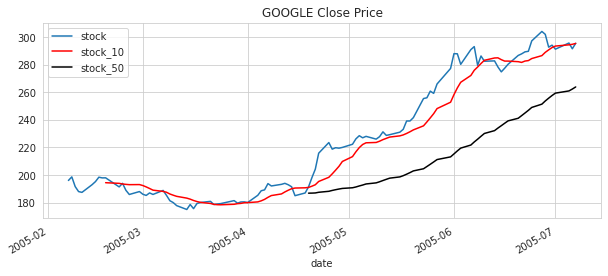

In [37]:
ax=GOOG.plot(x='date',y='stock',title='GOOGLE Close Price',figsize=(10,4))
GOOG.plot(x='date',y='stock_10',color='red',ax=ax)
GOOG.plot(x='date',y='stock_50',color='k',ax=ax)
plt.ioff()

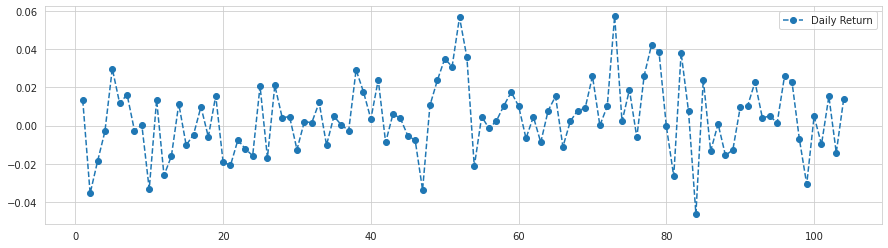

In [40]:
GOOG['Daily Return']=GOOG['stock'].pct_change()
GOOG['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

**Average Daily return**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



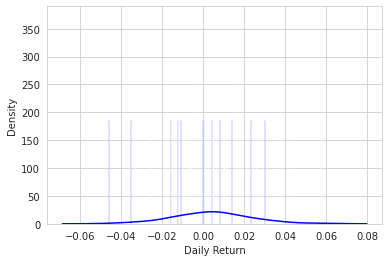

In [43]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=2000,color='blue')
plt.ioff()

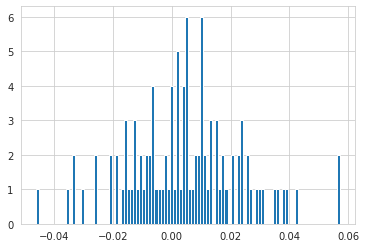

In [44]:
GOOG['Daily Return'].hist(bins=100)
plt.ioff()

**Checking if the Stock Prices of google are Correlogram**

In [45]:
df=GOOG['date'].copy()
df=pd.DataFrame(df)
df['GOOG']=GOOG['stock']
df.drop(['date'], axis = 1, inplace = True, errors = 'ignore')

In [46]:
tech_rets=df.pct_change()
tech_rets=pd.DataFrame(tech_rets)
tech_rets['date']=GOOG['date']
tech_rets.shape

(105, 2)

**Forecasting Stock Price**

In [54]:
GOOG.head()

,date,stock,stock_10,stock_50,Daily Return
0,2005-02-07,196.03,NaN,NaN,NaN
1,2005-02-08,198.64,NaN,NaN,0.013314
2,2005-02-09,191.58,NaN,NaN,-0.035542
3,2005-02-10,187.98,NaN,NaN,-0.018791
4,2005-02-11,187.40,NaN,NaN,-0.003085


In [56]:
df_prophet=GOOG[['date','stock']]
df_prophet=df_prophet.sort_values('date')
df_prophet

,date,stock
0,2005-02-07,196.03
1,2005-02-08,198.64
2,2005-02-09,191.58
3,2005-02-10,187.98
4,2005-02-11,187.40
...,...,...
100,2005-06-30,294.15
101,2005-07-01,291.25
102,2005-07-05,295.71
103,2005-07-06,291.52


**Renaiming the Column names to Suite Prophet Algorithm**

In [59]:
df_prophet=df_prophet.rename(columns={'date':'ds','stock':'y'})
df_prophet

,ds,y
0,2005-02-07,196.03
1,2005-02-08,198.64
2,2005-02-09,191.58
3,2005-02-10,187.98
4,2005-02-11,187.40
...,...,...
100,2005-06-30,294.15
101,2005-07-01,291.25
102,2005-07-05,295.71
103,2005-07-06,291.52


In [60]:
import random 
import seaborn as sns
from fbprophet import Prophet
m=Prophet()
m.fit(df_prophet)
future=m.make_future_dataframe(periods=105)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-02-07,195.520226,188.585338,203.303168,195.520226,195.520226,0.556110,0.556110,0.556110,0.556110,0.556110,0.556110,0.0,0.0,0.0,196.076336
1,2005-02-08,195.119151,188.159499,203.115307,195.119151,195.119151,0.546319,0.546319,0.546319,0.546319,0.546319,0.546319,0.0,0.0,0.0,195.665470
2,2005-02-09,194.718077,186.831712,202.064736,194.718077,194.718077,-0.227073,-0.227073,-0.227073,-0.227073,-0.227073,-0.227073,0.0,0.0,0.0,194.491004
3,2005-02-10,194.317002,186.339915,202.155686,194.317002,194.317002,-0.295931,-0.295931,-0.295931,-0.295931,-0.295931,-0.295931,0.0,0.0,0.0,194.021071
4,2005-02-11,193.915927,185.661468,201.119950,193.915927,193.915927,-0.587197,-0.587197,-0.587197,-0.587197,-0.587197,-0.587197,0.0,0.0,0.0,193.328730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2005-10-16,369.348859,315.736638,425.778125,315.334150,425.571475,0.003886,0.003886,0.003886,0.003886,0.003886,0.003886,0.0,0.0,0.0,369.352745
206,2005-10-17,370.036144,317.708329,426.790398,314.930686,427.263608,0.556110,0.556110,0.556110,0.556110,0.556110,0.556110,0.0,0.0,0.0,370.592254
207,2005-10-18,370.723429,316.357700,429.298296,314.533825,428.610842,0.546319,0.546319,0.546319,0.546319,0.546319,0.546319,0.0,0.0,0.0,371.269748
208,2005-10-19,371.410715,315.802174,429.356441,314.200201,429.938797,-0.227073,-0.227073,-0.227073,-0.227073,-0.227073,-0.227073,0.0,0.0,0.0,371.183642


**Plotting the Apple Stock Forecast for Period of One years**

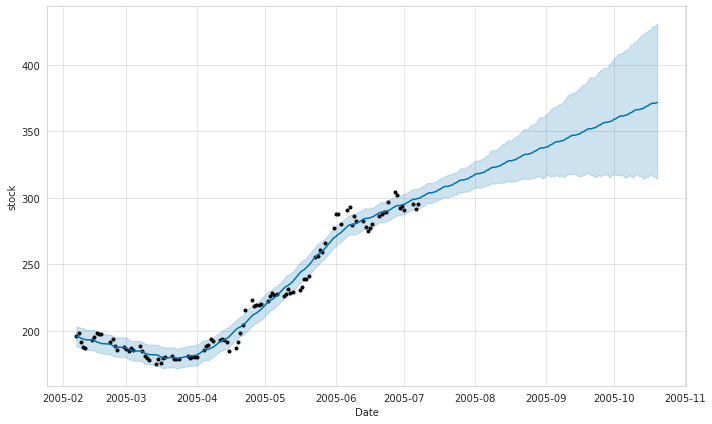

In [61]:
figure=m.plot(forecast,xlabel='Date',ylabel='stock')

**Plotting component of the Forecast**

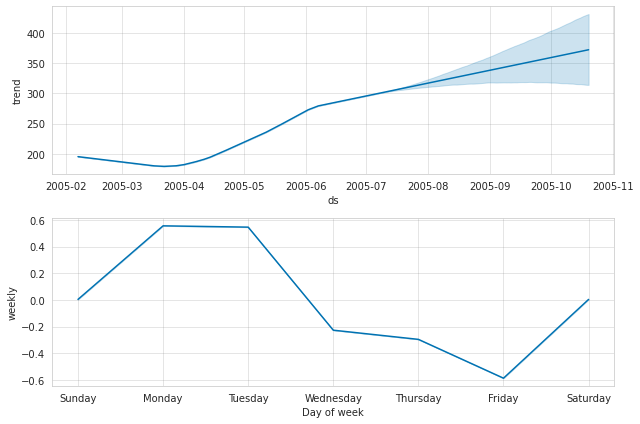

In [62]:
figure=m.plot_components(forecast)

**Conclusion**

  In this Notebook we have explored stock prices of google stocks.We have looked at the historical price of stock price.We have looked at the volume of stock traded.

  We have looked at the daily Return of stock.We have done correlogram between the stock prices.maximum daily fluctuation in ths stock is 8 % .In stock exchange there is a limit on per day fluctuation of stock.So if the stock reaches the threshold value then the trading of the stock is stopped for that day

  We have used Facebook Prophet to predict the stock price of Google  Stock.The model predicts that the google preice increase and decreased.Ivestors must have made good money on it.Weekly trend shows that the Stock price increase is highest on Tuesday then reduces as week proceeds.Please do note that Saturday and Sunday are off for the Stock Exchange.The annual trend shows the seasoniality of the stock.It can be figured out the stock price peaks in month of june.